In [86]:
import numpy as np
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv("scraped_raw_new.csv")

In [88]:
#TEST SET
df_test = pd.read_csv("fake_comments.csv", header=None, names = ['comment'])

In [89]:
#TEST
df_test.head()

,comment
0,I just love my audi oh my god it's performance...
1,volkswagen shits on audi oh my god I hate bmw
2,if I have to drive this piece of shit bmw one ...
3,I'm a proud chevy man it's performance and sea...
4,The safety ratings in acura really suck but I ...


In [90]:
df.shape

(5050, 4)

In [91]:
models_df = pd.read_csv("models.csv", header = None, names = ['make', 'model'])

In [92]:
models_df.head()

,make,model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [93]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
#remove stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
def clean(s):
    s = s.lower()
    #s_token = word_tokenize(s)
    s_token = tokenizer.tokenize(s)
    s_filtered = [w for w in s_token if not w in stops]
    return s_filtered

In [95]:
df.dropna(inplace = True)
df['comment_tokenized'] = df['comments'].apply(clean)

In [96]:
#TEST
df_test.dropna(inplace = True)
df_test['comment_tokenized'] = df_test['comment'].apply(clean)

In [97]:
models_dict = models_df.set_index('model')['make'].to_dict()

In [98]:
def model_to_make(s):
    for i in range(len(s)):
        if s[i] in models_dict.keys():
            s[i] = models_dict[s[i]]
    return s

In [99]:
df['comment_tokenized']=df['comment_tokenized'].apply(model_to_make)

In [100]:
#TEST
df_test['comment_tokenized']=df_test['comment_tokenized'].apply(model_to_make)

In [101]:
from nltk.util import ngrams
from collections import Counter

def get_counts(s):
    return Counter(s)

In [102]:
df['word_counts'] = df['comment_tokenized'].apply(get_counts)

In [103]:
#TEST
df_test['word_counts'] = df_test['comment_tokenized'].apply(get_counts)

In [104]:
makes_dict = {}
for make in models_df['make'].unique():
    makes_dict[make] = 0

In [105]:
#TEST
makes_dict_test = {}
for make in models_df['make'].unique():
    makes_dict_test[make] = 0

In [106]:
def count_makes(s):
    for key in s.keys():
        if key in makes_dict:
            makes_dict[key] += 1

In [107]:
#TEST
def count_makes_test(s):
    for key in s.keys():
        if key in makes_dict_test:
            makes_dict_test[key] += 1

In [108]:
df['word_counts'].apply(count_makes)
print(makes_dict)

{'acura': 588, 'audi': 460, 'bmw': 1385, 'buick': 29, 'cadillac': 112, 'chevrolet': 110, 'chrysler': 64, 'dodge': 59, 'ford': 143, 'honda': 461, 'hyundai': 117, 'infiniti': 417, 'kia': 24, 'lincoln': 56, 'mazda': 83, 'mercedes': 178, 'mercury': 5, 'mitsubishi': 23, 'nissan': 316, 'pontiac': 52, 'saturn': 12, 'subaru': 217, 'suzuki': 19, 'toyota': 330, 'volkswagen': 200, 'volvo': 138}


In [109]:
#TEST
df_test['word_counts'].apply(count_makes_test)
print(makes_dict_test)

{'acura': 1, 'audi': 5, 'bmw': 9, 'buick': 0, 'cadillac': 0, 'chevrolet': 4, 'chrysler': 0, 'dodge': 0, 'ford': 0, 'honda': 6, 'hyundai': 0, 'infiniti': 0, 'kia': 0, 'lincoln': 0, 'mazda': 0, 'mercedes': 1, 'mercury': 0, 'mitsubishi': 0, 'nissan': 0, 'pontiac': 0, 'saturn': 0, 'subaru': 3, 'suzuki': 0, 'toyota': 5, 'volkswagen': 1, 'volvo': 1}


## TOP 10 BRANDS

In [110]:
top_10_brands = sorted(makes_dict, key=makes_dict.get, reverse=True)[:10]

In [111]:
#TEST
top_10_brands_test = sorted(makes_dict_test, key=makes_dict_test.get, reverse=True)[:10]

In [112]:
top_10_brands

['bmw',
 'acura',
 'honda',
 'audi',
 'infiniti',
 'toyota',
 'nissan',
 'subaru',
 'volkswagen',
 'mercedes']

In [113]:
top_10_brands_test

['bmw',
 'honda',
 'audi',
 'toyota',
 'chevrolet',
 'subaru',
 'acura',
 'mercedes',
 'volkswagen',
 'volvo']

In [114]:
top_10_brands_num = sorted(np.fromiter(makes_dict.values(), dtype=float), reverse=True)[:10]

In [115]:
#TEST
top_10_brands_num_test = sorted(np.fromiter(makes_dict_test.values(), dtype=float), reverse=True)[:10]

### Calculate lifts

In [136]:
brand_comentions = np.zeros((10, 10))

def count_comentions(s):
    for i in range(10):
        for j in range(10):
            if top_10_brands[i] in s.keys() and top_10_brands[j] in s.keys():
                brand_comentions[i][j]+=1
temp = df['word_counts'].apply(count_comentions)

In [117]:
#TEST
brand_comentions_test = np.zeros((10, 10))

def count_comentions_test(s):
    for i in range(10):
        for j in range(10):
            if top_10_brands_test[i] in s.keys() and top_10_brands_test[j] in s.keys():
                brand_comentions_test[i][j]+=1
temp = df_test['word_counts'].apply(count_comentions_test)

In [118]:
df_brand_comentions = pd.DataFrame(brand_comentions, columns=top_10_brands, index = top_10_brands)
df_brand_comentions

,bmw,acura,honda,audi,infiniti,toyota,nissan,subaru,volkswagen,mercedes
bmw,1385.0,250.0,157.0,229.0,230.0,128.0,104.0,73.0,92.0,95.0
acura,250.0,588.0,144.0,119.0,149.0,66.0,82.0,53.0,40.0,47.0
honda,157.0,144.0,461.0,54.0,55.0,119.0,109.0,30.0,40.0,28.0
audi,229.0,119.0,54.0,460.0,97.0,37.0,42.0,35.0,90.0,55.0
infiniti,230.0,149.0,55.0,97.0,417.0,33.0,73.0,31.0,33.0,44.0
toyota,128.0,66.0,119.0,37.0,33.0,330.0,77.0,18.0,28.0,22.0
nissan,104.0,82.0,109.0,42.0,73.0,77.0,316.0,23.0,31.0,19.0
subaru,73.0,53.0,30.0,35.0,31.0,18.0,23.0,217.0,21.0,10.0
volkswagen,92.0,40.0,40.0,90.0,33.0,28.0,31.0,21.0,200.0,26.0
mercedes,95.0,47.0,28.0,55.0,44.0,22.0,19.0,10.0,26.0,178.0


In [119]:
#TEST
print(top_10_brands_test)
print(brand_comentions_test)

['bmw', 'honda', 'audi', 'toyota', 'chevrolet', 'subaru', 'acura', 'mercedes', 'volkswagen', 'volvo']
[[9. 0. 3. 0. 1. 0. 1. 1. 1. 0.]
 [0. 6. 0. 4. 2. 1. 0. 0. 0. 0.]
 [3. 0. 5. 0. 0. 0. 0. 0. 1. 0.]
 [0. 4. 0. 5. 1. 0. 0. 0. 0. 0.]
 [1. 2. 0. 1. 4. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 3. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [120]:
lifts = np.zeros((10, 10))
N = len(df)
for i in range(10):
    count1 = top_10_brands_num[i]
    for j in range(10):
        count2 = top_10_brands_num[j]
        denom = count1 * count2
        numer = brand_comentions[i][j]
        lifts[i][j] = (numer/denom) * N
np.set_printoptions(precision = 1)
df_lifts = pd.DataFrame(lifts, columns=top_10_brands, index = top_10_brands)
df_lifts

,bmw,acura,honda,audi,infiniti,toyota,nissan,subaru,volkswagen,mercedes
bmw,3.636101,1.545961,1.238325,1.810146,2.005523,1.410366,1.196691,1.223205,1.672606,1.940616
acura,1.545961,8.564626,2.675284,2.215631,3.060262,1.712925,2.222466,2.091821,1.712925,2.261446
honda,1.238325,2.675284,10.924078,1.282392,1.440826,3.939289,3.768116,1.510241,2.184816,1.718394
audi,1.810146,2.215631,1.282392,10.947826,2.546617,1.227484,1.455091,1.765778,4.926522,3.382755
infiniti,2.005523,3.060262,1.440826,2.546617,12.076739,1.207674,2.789879,1.725248,1.992662,2.985261
toyota,1.410366,1.712925,3.939289,1.227484,1.207674,15.260606,3.718565,1.265857,2.136485,1.886142
nissan,1.196691,2.222466,3.768116,1.455091,2.789879,3.718565,15.936709,1.689144,2.470190,1.701109
subaru,1.223205,2.091821,1.510241,1.765778,1.725248,1.265857,1.689144,23.207373,2.436774,1.303785
volkswagen,1.672606,1.712925,2.184816,4.926522,1.992662,2.136485,2.470190,2.436774,25.180000,3.677978
mercedes,1.940616,2.261446,1.718394,3.382755,2.985261,1.886142,1.701109,1.303785,3.677978,28.292135


## Make MDS Plot

In [121]:
dissimilarity = lifts
for i in range(10):
    for j in range(10):
        if i == j:
            dissimilarity[i][j]=0
        else:
            dissimilarity[i][j] = 1/lifts[i][j]
        
df_dissimilarity = pd.DataFrame(dissimilarity, columns=top_10_brands, index = top_10_brands)
df_dissimilarity

,bmw,acura,honda,audi,infiniti,toyota,nissan,subaru,volkswagen,mercedes
bmw,0.000000,0.646847,0.807542,0.552442,0.498623,0.709036,0.835637,0.817525,0.597869,0.515300
acura,0.646847,0.000000,0.373792,0.451339,0.326769,0.583797,0.449951,0.478052,0.583797,0.442195
honda,0.807542,0.373792,0.000000,0.779793,0.694047,0.253853,0.265385,0.662146,0.457705,0.581939
audi,0.552442,0.451339,0.779793,0.000000,0.392678,0.814675,0.687242,0.566322,0.202983,0.295617
infiniti,0.498623,0.326769,0.694047,0.392678,0.000000,0.828038,0.358438,0.579627,0.501841,0.334979
toyota,0.709036,0.583797,0.253853,0.814675,0.828038,0.000000,0.268921,0.789979,0.468059,0.530183
nissan,0.835637,0.449951,0.265385,0.687242,0.358438,0.268921,0.000000,0.592016,0.404827,0.587852
subaru,0.817525,0.478052,0.662146,0.566322,0.579627,0.789979,0.592016,0.000000,0.410379,0.766998
volkswagen,0.597869,0.583797,0.457705,0.202983,0.501841,0.468059,0.404827,0.410379,0.000000,0.271889
mercedes,0.515300,0.442195,0.581939,0.295617,0.334979,0.530183,0.587852,0.766998,0.271889,0.000000


C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


<Figure size 640x640 with 0 Axes>

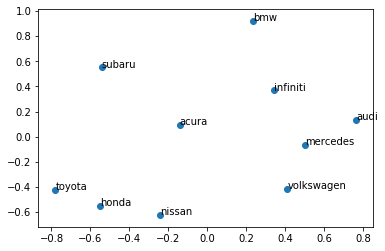

<Figure size 720x720 with 0 Axes>

In [122]:
from sklearn.manifold import MDS
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
mds = MDS(dissimilarity='euclidean')
coords = mds.fit_transform(dissimilarity)

x,y = coords.T

fig, ax=plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(x,y)

for i, txt in enumerate(top_10_brands):
    ax.annotate(txt, (x[i],y[i]))

In [123]:
#TEST
lift_test = np.zeros((10, 10))
N = 22
for i in range(10):
    count1 = top_10_brands_num_test[i]
    for j in range(10):
        count2 = top_10_brands_num_test[j]
        denom = count1 * count2
        numer = brand_comentions_test[i][j]
        lift_test[i][j] = (numer/denom) * N
np.set_printoptions(precision = 2)
print(lift_test)

[[ 2.44  0.    1.47  0.    0.61  0.    2.44  2.44  2.44  0.  ]
 [ 0.    3.67  0.    2.93  1.83  1.22  0.    0.    0.    0.  ]
 [ 1.47  0.    4.4   0.    0.    0.    0.    0.    4.4   0.  ]
 [ 0.    2.93  0.    4.4   1.1   0.    0.    0.    0.    0.  ]
 [ 0.61  1.83  0.    1.1   5.5   1.83  0.    0.    0.    0.  ]
 [ 0.    1.22  0.    0.    1.83  7.33  0.    0.    0.    0.  ]
 [ 2.44  0.    0.    0.    0.    0.   22.    0.    0.    0.  ]
 [ 2.44  0.    0.    0.    0.    0.    0.   22.    0.    0.  ]
 [ 2.44  0.    4.4   0.    0.    0.    0.    0.   22.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.   22.  ]]


# TASK B

# TASK C

In [124]:
from itertools import chain
pd.set_option('display.max_rows', None)
all_words = pd.Series(chain(*list(df['word_counts'])))
word_frequency = all_words.value_counts()
word_frequency

car                                                              2047
bmw                                                              1385
like                                                             1284
cars                                                             1256
3                                                                1148
one                                                              1133
would                                                            1045
tl                                                               1037
get                                                               992
think                                                             943
g35                                                               837
drive                                                             750
much                                                              745
better                                                            729
even                

In [125]:
attribute_dict = { 
    'performance': ['drive', 'engine', 'sport', 'driving', 'performance', 'power', 'spped', 
                    'fast', 'faster', 'sporty', 'horsepower', 'powerful'],
    
    'fuel_efficiency': ['mile', 'mileage', 'oil', 'diesel', 'mpg', 'gas', 'fuel'],
    
    'look': ['look', 'nice', 'looking', 'design', 'nicer', 'style', 'attractive', 'designed', 'looked'],
    
    'luxury': ['great', 'brand', 'luxury', 'best', 'premium'],
    
    'reliability': ['issue', 'problem', 'recall', 'trouble', 'concerned', 'suspension', 'reliable',
                   'service', 'warranty', 'durability', 'quality'],
    
    'price': ['money', 'msrp', 'price', 'sale', 'offer', 'discount', 'bargain', 'grand', 'expensive',
             'cheap', 'cheaper', 'incentive', 'worth'],
    
    'size': ['big', 'huge', 'large', 'size', 'weight', 'bigger', 'sticker', 'roof',
            'little', 'small', 'light', 'smaller', 'biggest'],
    'interior': ['seat', 'interior', 'leather', 'steering', 'inside', 'radio', 'noise', 'quiet'],
    
    'experience': ['experience', 'special', 'interesting', 'impressive', 'surprised', 'amazing', 
                   'fun', 'happy', 'enthusiast'],
    
    'safety': ['safety', 'life', 'safe']}

In [126]:
attributes = {}
for key in attribute_dict.keys():
    attributes[key] = 0

In [127]:
def count_attributes(s):
    for idx in s.index:
        for key in attribute_dict.keys():
            if idx in attribute_dict[key]:
                attributes[key] = attributes[key] + word_frequency[idx]
        
count_attributes(word_frequency)
attributes

{'performance': 3735,
 'fuel_efficiency': 775,
 'look': 1336,
 'luxury': 1784,
 'reliability': 991,
 'price': 1384,
 'size': 1499,
 'interior': 949,
 'experience': 909,
 'safety': 238}

In [128]:
top_5_attr = sorted(attributes, key=attributes.get, reverse=True)[:5]
top_5_attr

['performance', 'luxury', 'size', 'price', 'look']

In [129]:
top_5_attr_num = sorted(np.fromiter(attributes.values(), dtype=float), reverse=True)[:5]
top_5_attr_num

[3735.0, 1784.0, 1499.0, 1384.0, 1336.0]

In [132]:
top_5_brands = top_10_brands[:5]
top_5_brands_num = top_10_brands_num[:5]

In [134]:
brands_attributes = top_5_brands + top_5_attr
brands_attributes_num = top_5_brands_num + top_5_attr_num

In [151]:
brand_attr_comentions = np.zeros((10, 10))

def count_ba_comentions(s):
    for i in range(10):
        for j in range(10):
            if brands_attributes[i] in s.keys() and brands_attributes[j] in s.keys():
                brand_attr_comentions[i][j]+=1
trash = df['word_counts'].apply(count_ba_comentions)

In [152]:
df_brand_attr_comentions = pd.DataFrame(brand_attr_comentions, columns=brands_attributes, index=brands_attributes)
df_brand_attr_comentions

,bmw,acura,honda,audi,infiniti,performance,luxury,size,price,look
bmw,1385.0,250.0,157.0,229.0,230.0,283.0,181.0,74.0,181.0,150.0
acura,250.0,588.0,144.0,119.0,149.0,118.0,113.0,31.0,81.0,72.0
honda,157.0,144.0,461.0,54.0,55.0,93.0,83.0,30.0,75.0,50.0
audi,229.0,119.0,54.0,460.0,97.0,85.0,69.0,26.0,84.0,64.0
infiniti,230.0,149.0,55.0,97.0,417.0,87.0,69.0,28.0,58.0,47.0
performance,283.0,118.0,93.0,85.0,87.0,680.0,201.0,41.0,115.0,72.0
luxury,181.0,113.0,83.0,69.0,69.0,201.0,475.0,34.0,89.0,59.0
size,74.0,31.0,30.0,26.0,28.0,41.0,34.0,151.0,40.0,26.0
price,181.0,81.0,75.0,84.0,58.0,115.0,89.0,40.0,439.0,47.0
look,150.0,72.0,50.0,64.0,47.0,72.0,59.0,26.0,47.0,384.0


In [155]:
lifts_br_attr = np.zeros((10, 10))
N = len(df)
for i in range(10):
    count1 = brands_attributes_num[i]
    for j in range(10):
        count2 = brands_attributes_num[j]
        denom = count1 * count2
        numer = brand_attr_comentions[i][j]
        lifts_br_attr[i][j] = (numer/denom) * N
np.set_printoptions(precision = 1)
df_lifts_br_attr = pd.DataFrame(lifts_br_attr, columns=brands_attributes, index = brands_attributes)
df_lifts_br_attr

,bmw,acura,honda,audi,infiniti,performance,luxury,size,price,look
bmw,3.636101,1.545961,1.238325,1.810146,2.005523,0.275506,0.368909,0.179501,0.475531,0.408245
acura,1.545961,8.564626,2.675284,2.215631,3.060262,0.270583,0.542490,0.177120,0.501253,0.461567
honda,1.238325,2.675284,10.924078,1.282392,1.440826,0.272005,0.508239,0.218627,0.591984,0.408835
audi,1.810146,2.215631,1.282392,10.947826,2.546617,0.249147,0.423430,0.189889,0.664463,0.524447
infiniti,2.005523,3.060262,1.440826,2.546617,12.076739,0.281306,0.467094,0.225583,0.506106,0.424855
performance,0.275506,0.270583,0.272005,0.249147,0.281306,0.245478,0.151913,0.036879,0.112036,0.072664
luxury,0.368909,0.542490,0.508239,0.423430,0.467094,0.151913,0.751605,0.064028,0.181528,0.124663
size,0.179501,0.177120,0.218627,0.189889,0.225583,0.036879,0.064028,0.338423,0.097097,0.065381
price,0.475531,0.501253,0.591984,0.664463,0.506106,0.112036,0.181528,0.097097,1.154192,0.128009
look,0.408245,0.461567,0.408835,0.524447,0.424855,0.072664,0.124663,0.065381,0.128009,1.083438


In [157]:
#ONLY RUN ONCE
df_lifts_br_attr_chopped = df_lifts_br_attr
df_lifts_br_attr_chopped.drop(columns=['bmw','acura','honda','audi','infiniti'], inplace=True)

In [158]:
df_lifts_br_attr_chopped = df_lifts_br_attr_chopped[:5]
df_lifts_br_attr_chopped

,performance,luxury,size,price,look
bmw,0.275506,0.368909,0.179501,0.475531,0.408245
acura,0.270583,0.542490,0.177120,0.501253,0.461567
honda,0.272005,0.508239,0.218627,0.591984,0.408835
audi,0.249147,0.423430,0.189889,0.664463,0.524447
infiniti,0.281306,0.467094,0.225583,0.506106,0.424855


# PART D

# PART E

In [263]:
#make aspirational dictionary
aspirational_uni = ['wish', 'love', 'want', 'hope', 'get', 'buy', 'purchase', 'test', 'dream', 'need', 'goal']
aspirational_bi = [('love', 'to'), ('want','to'), ('hope','to'), ('dream','car'), ('need','to'), ('test','drive')]
aspirational_tri = [('want', 'to', 'buy'), ('need', 'to','have'), ('save','for','a'),('want', 'to', 'have')]

In [264]:
# from nltk import ngrams
# sentence = 'this is a foo bar sentences and i want to ngramize it'
# n = 6
# sixgrams = ngrams(sentence.split(), n)
# for gram in sixgrams:
#     print(gram == ('yeet','yeet2'))

In [265]:
from nltk import ngrams
def clean_no_stop(s):
    s = s.lower()
    s_token = tokenizer.tokenize(s)
    return s_token

df['token_no_stop']=df['comments'].apply(clean_no_stop)

In [266]:
def get_bigrams(s):
    return list(ngrams(s,2))

def get_trigrams(s):
    return list(ngrams(s,3))

df['bigrams'] = df['token_no_stop'].apply(get_bigrams)
df['trigrams'] = df['token_no_stop'].apply(get_trigrams)

In [274]:
def count_unigrams(s):
    for word in s:
        for key in uni_dict.keys():
            if word == key:
                uni_dict[key] += 1

def count_bigrams(s):
    for gram in s:
        for key in bi_dict.keys():
            if gram == key:
                bi_dict[key] += 1
                
def count_trigrams(s):
    for gram in s:
        for key in tri_dict.keys():
            if gram == key:
                tri_dict[key] += 1
                
uni_dict = dict.fromkeys(aspirational_uni,0)
bi_dict = dict.fromkeys(aspirational_bi,0)
tri_dict = dict.fromkeys(aspirational_tri,0)

trash = df['comment_tokenized'].apply(count_unigrams)
trash = df['bigrams'].apply(count_bigrams)
trash = df['trigrams'].apply(count_trigrams)

{'wish': 53,
 'love': 269,
 'want': 730,
 'hope': 112,
 'get': 1294,
 'buy': 539,
 'purchase': 73,
 'test': 527,
 'dream': 17,
 'need': 379,
 'goal': 15}

In [273]:
aspiration_count = 0
for key, val in uni_dict.items():
    aspiration_count += uni_dict[key]
for key, val in bi_dict.items():
    aspiration_count += bi_dict[key]
for key, val in tri_dict.items():
    aspiration_count += tri_dict[key]
aspiration_count

4656